In [1]:
import pandas as pd
df=pd.DataFrame()  #create empty datafranme

In [3]:
print(df)

Empty DataFrame
Columns: []
Index: []


In [10]:
data=[0.2,0.4,0.6,0.8]
df=pd.DataFrame(data,columns=['Bacteria_size'])

In [81]:
df

,Bacteria_size,Max_Growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [12]:
df['Max_Growth']=[3.4,3.8,4.2,4.6]

In [13]:
df

,Bacteria_size,Max_Growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [21]:
#split
x_train=df.iloc[0:3,:-1]
y_train=df.iloc[:3,-1:]
x_test=df.iloc[3:,:-1]
y_test=df.iloc[3:,-1:]

In [80]:
x_train

,Bacteria_size
0,0.2
1,0.4
2,0.6


In [23]:
y_train

,Max_Growth
0,3.4
1,3.8
2,4.2


In [24]:
x_test

,Bacteria_size
3,0.8


In [25]:
y_test

,Max_Growth
3,4.6


In [28]:
import sympy as sym

In [72]:
#step 1: initialize model params
mi=1
ci=-1
n=0.01
epochs=10

MSE=[]

#step 2: start iteration
for iter in range(1,epochs+1):
  print("ITERATION: {}".format(iter))
  print("+++++++++++++++++++++++++++++++++++++++++++++++++")
  #step 3: iterate sample
  for sample in range(0,len(x_train)):
    xa=x_train['Bacteria_size'][sample]
    ya=y_train['Max_Growth'][sample]
    print("--->sample {} ".format(sample+1)+"x={}".format(xa)+"y={}".format(ya))

    #step 4: Compute Gradient(to know how error rate is affected w.r.t m,c)
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')


    E=(0.5)*(y-m*x-c)**2 #half mean squared equation

    #so as to substitute values into equation, we need to declare vars as symbols
    #we need to explicitely tell python control that the vars are symbols

    deltaE_m=sym.diff(E,m)
    deltaE_c=sym.diff(E,c)
    # print(deltaE_m)
    # print(deltaE_c)

    #substitute values in deltaE_m
    deltaE_m=deltaE_m.subs(m,mi)
    deltaE_m=deltaE_m.subs(c,ci)
    deltaE_m=deltaE_m.subs(x,xa)
    deltaE_m=deltaE_m.subs(y,ya)

    #substitute values in deltaE_c
    deltaE_c=deltaE_c.subs(m,mi)
    deltaE_c=deltaE_c.subs(c,ci)
    deltaE_c=deltaE_c.subs(x,xa)
    deltaE_c=deltaE_c.subs(y,ya)

    print("Obtained Gradient wrt m and c: ")
    print("deltaE_m: ",deltaE_m)
    print("deltaE_c: ",deltaE_c)

    #step5: Calculate step lenght-change
    del_m=-n*deltaE_m
    del_c=-n*deltaE_c

    #step 6: Updateing the model params
    mi=mi+del_m
    ci=ci+del_c




    print("m:{}".format(mi)+" c:{}".format(ci))

  E=E.subs(m,mi)
  E=E.subs(c,ci)
  E=E.subs(x,xa)
  E=E.subs(y,ya)
  print("Error: ",E)


  MSE.append(E)

  print("----------------------------------------------------")

print("Optional Params: ")
print("m= {}".format(mi))
print("c= {}".format(ci))

ITERATION: 1
+++++++++++++++++++++++++++++++++++++++++++++++++
--->sample 1 x=0.2y=3.4
Obtained Gradient wrt m and c: 
deltaE_m:  -0.840000000000000
deltaE_c:  -4.20000000000000
m:1.00840000000000 c:-0.958000000000000
--->sample 2 x=0.4y=3.8
Obtained Gradient wrt m and c: 
deltaE_m:  -1.74185600000000
deltaE_c:  -4.35464000000000
m:1.02581856000000 c:-0.914453600000000
--->sample 3 x=0.6y=4.2
Obtained Gradient wrt m and c: 
deltaE_m:  -2.69937747840000
deltaE_c:  -4.49896246400000
m:1.05281233478400 c:-0.869463975360000
Error:  9.84693046254432
----------------------------------------------------
ITERATION: 2
+++++++++++++++++++++++++++++++++++++++++++++++++
--->sample 1 x=0.2y=3.4
Obtained Gradient wrt m and c: 
deltaE_m:  -0.811780301680640
deltaE_c:  -4.05890150840320
m:1.06093013780081 c:-0.828874960275968
--->sample 2 x=0.4y=3.8
Obtained Gradient wrt m and c: 
deltaE_m:  -1.68180116206226
deltaE_c:  -4.20450290515565
m:1.07774814942143 c:-0.786829931224411
--->sample 3 x=0.6y=4.2


In [74]:
MSE

[9.84693046254432,
 9.16414226638526,
 8.52820502344260,
 7.93592173812699,
 7.38431295052737,
 6.87060195613102,
 6.39220102901739,
 5.94669858042364,
 5.53184718920099,
 5.14555244498817]

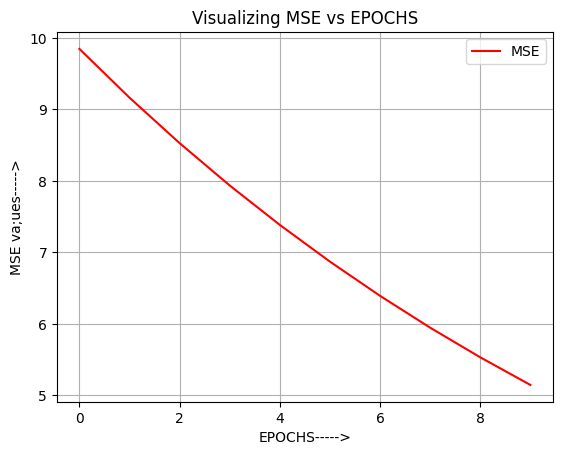

In [75]:
import matplotlib.pyplot as plt
plt.plot(MSE,label='MSE',color='red')
plt.xlabel("EPOCHS----->")
plt.ylabel("MSE va;ues----->")
plt.legend()
plt.grid()

plt.title("Visualizing MSE vs EPOCHS")
plt.show()

In [76]:
mi

1.45269099944424

In [77]:
ci

0.120410199373149

In [ ]:
y=(2.23)*xi+(2.8)

In [78]:
x_test

,Bacteria_size
3,0.8


In [79]:
y_pred=mi*x_test+ci
y_pred

,Bacteria_size
3,1.28256299892854


In [69]:
y_test

,Max_Growth
3,4.6
